# Color Transport using Optimal Transport

This example was inspired by a [tutorial](https://pythonot.github.io/auto_examples/domain-adaptation/plot_otda_mapping_colors_images.html#plot-pixel-values-distribution) by Remi Flamary and Stanislas Chambon.

In [58]:
import ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from skimage.io import imread, imsave

plt.rcParams['mathtext.fontset'] = 'custom' 
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans' 
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic' 
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold' 
plt.rcParams['font.size'] = 16 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral' 

In [2]:
def im2mat(img):
    """Converts and image to matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(img):
    return np.clip(img, 0, 1)

In [4]:
I1 = imread('./ocean_day.jpg').astype(np.float64) / 256
I2 = imread('./ocean_sunset.jpg').astype(np.float64) / 256

In [5]:
# Transforms images into vectors
X1 = I1.reshape(-1, I1.shape[-1])
X2 = I2.reshape(-1, I2.shape[-1])

In [6]:
# Sub-samples the pixels
nb = 1000
idx1 = np.random.randint(X1.shape[0], size=(nb,))
idx2 = np.random.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

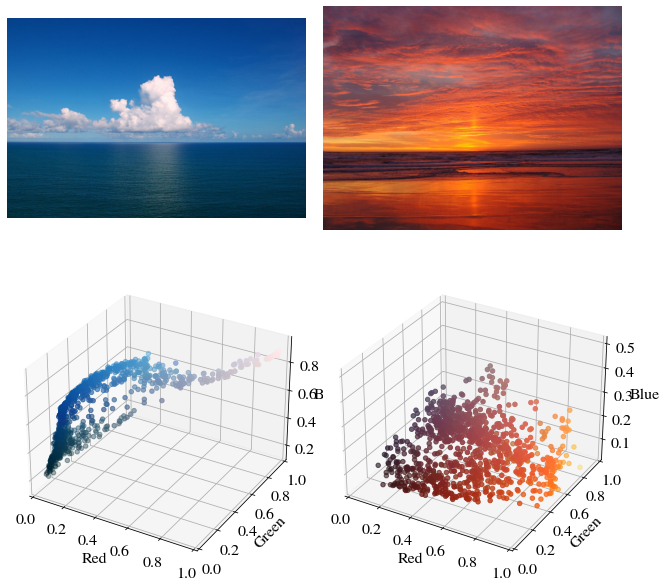

In [7]:
fig = plt.figure(figsize=(9, 9))

ax = fig.add_subplot(221)
ax.imshow(I1)
ax.axis('off')

ax = fig.add_subplot(222)
ax.imshow(I2)
ax.axis('off')

ax = fig.add_subplot(223, projection='3d')
ax.scatter3D(Xs[:, 0], Xs[:, 1], Xs[:, 2], c=Xs)
ax.axis([0, 1, 0, 1])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')


ax = fig.add_subplot(224, projection='3d')
ax.scatter3D(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=Xt)
ax.axis([0, 1, 0, 1])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.tight_layout()

plt.savefig('../Figures/MongeFit.svg')

In [8]:
# Fits Monge Mapping
ot_mapping_gaussian = ot.da.MappingTransport(
    mu=1e0, eta=1e-2, sigma=1, bias=False, max_iter=10, verbose=True)
ot_mapping_gaussian.fit(Xs=Xs, Xt=Xt)

It.  |Loss        |Delta loss
--------------------------------
    0|3.702805e+02|0.000000e+00
    1|3.588632e+02|-3.083410e-02
    2|3.585231e+02|-9.477700e-04
    3|3.583983e+02|-3.480123e-04
    4|3.583319e+02|-1.852132e-04
    5|3.582910e+02|-1.143168e-04
    6|3.582630e+02|-7.819073e-05
    7|3.582425e+02|-5.712016e-05
    8|3.582269e+02|-4.350896e-05
    9|3.582147e+02|-3.406678e-05
   10|3.582049e+02|-2.744369e-05


In [46]:
I3 = ot_mapping_gaussian.transform(Xs=X1)
I3 = minmax(I3.reshape(*I1.shape))
X3 = I3.reshape(-1, I3.shape[-1])

TXs = X3[idx1, :]

/home/eduardo/.conda/envs/OptimalTransport/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


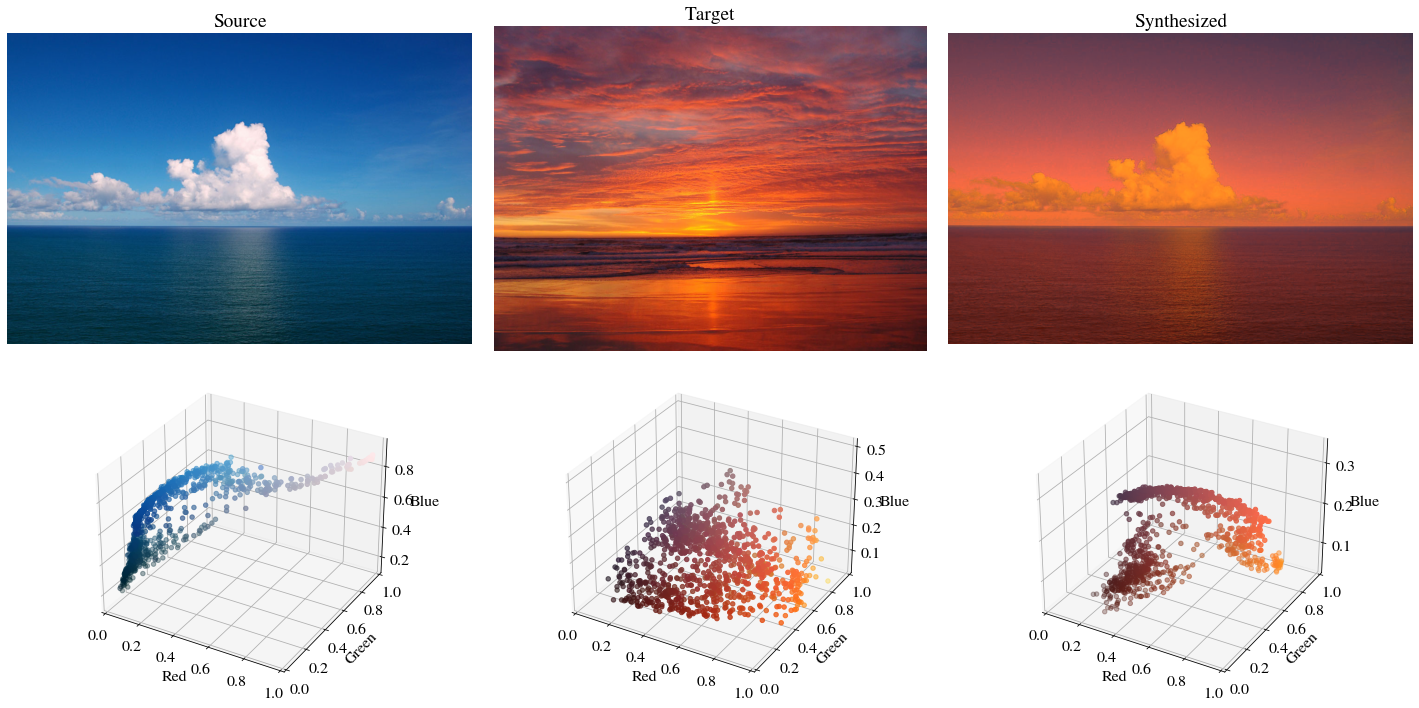

In [51]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(231)
ax.imshow(I1)
ax.set_title('Source')
ax.axis('off')

ax = fig.add_subplot(232)
ax.imshow(I2)
ax.set_title('Target')
ax.axis('off')

ax = fig.add_subplot(233)
ax.imshow(I3)
ax.set_title('Synthesized')
ax.axis('off')

ax = fig.add_subplot(233)
ax.imshow(I3)
ax.set_title('Synthesized')
ax.axis('off')

ax = fig.add_subplot(234, projection='3d')
ax.scatter3D(Xs[:, 0], Xs[:, 1], Xs[:, 2], c=Xs)
ax.axis([0, 1, 0, 1])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')


ax = fig.add_subplot(235, projection='3d')
ax.scatter3D(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=Xt)
ax.axis([0, 1, 0, 1])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.tight_layout()

ax = fig.add_subplot(236, projection='3d')
ax.scatter3D(TXs[:, 0], TXs[:, 1], TXs[:, 2], c=TXs)
ax.axis([0, 1, 0, 1])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.tight_layout()


plt.savefig('../Figures/SynthesisResult.svg')

## OT Plan

In [25]:
a = ot.unif(Xs.shape[0])
b = ot.unif(Xt.shape[0])
M = ot.dist(Xs, Xt)
G = ot.emd(a, b, M)

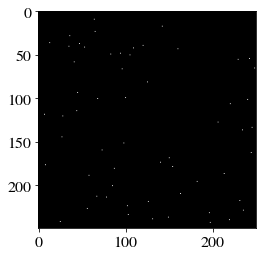

In [30]:
plt

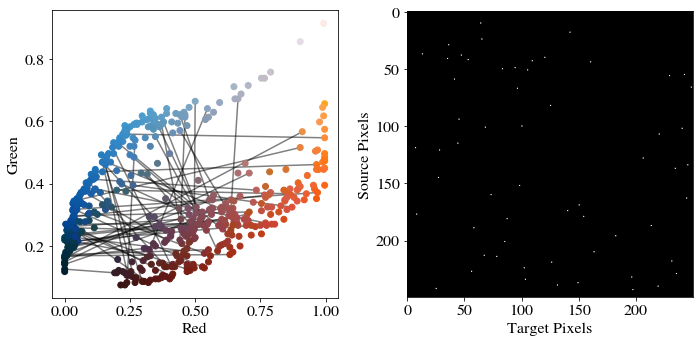

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(Xs[:250, 0], Xs[:250, 1], c=Xs[:250], zorder=2)
axes[0].scatter(Xt[:250, 0], Xt[:250, 1], c=Xt[:250], zorder=2)

for i in range(250):
    for j in range(250):
        if G[i, j] > 0:
            axes[0].plot([Xs[i, 0], Xt[i, 0]], [Xs[i, 1], Xt[i, 1]], c='k', zorder=1, alpha=0.5)

axes[0].set_xlabel('Red')
axes[0].set_ylabel('Green')

axes[1].imshow(G[:250, :250], cmap='gray')
axes[1].set_ylabel('Source Pixels')
axes[1].set_xlabel('Target Pixels')

plt.tight_layout()
plt.savefig('../Figures/TPlan.svg')

In [80]:
a = ot.unif(Xs.shape[0])
b = ot.unif(Xt.shape[0])
M = ot.dist(Xs, Xt)
G = ot.sinkhorn(a, b, M, reg=1e-2)
norm_G = (G - np.min(G)) / (np.max(G) - np.min(G))

2708


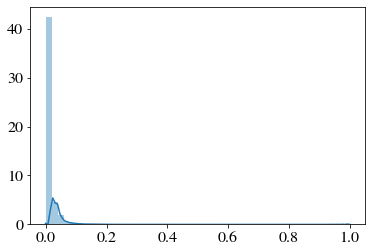

In [81]:
sns.distplot(norm_G.flatten())
print(len(np.where(norm_G > 0.15)[0]))

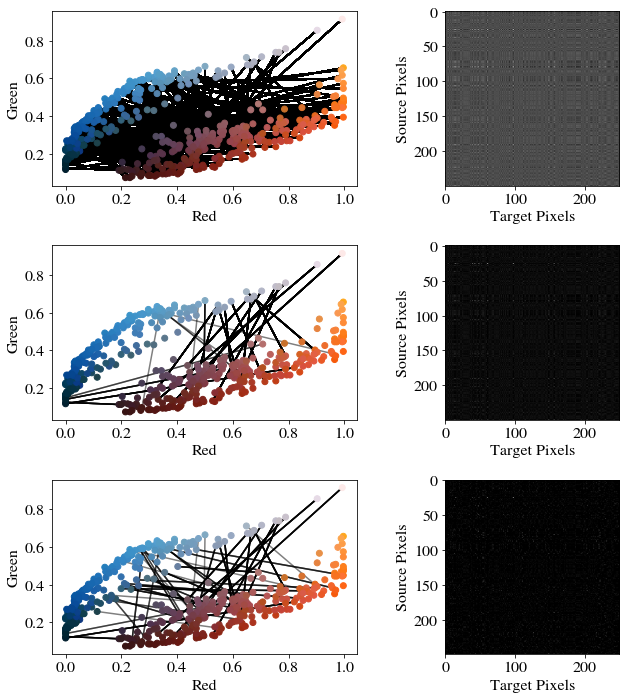

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
regs = [1, 1e-1, 1e-2]

for k in range(3):
    a = ot.unif(Xs.shape[0])
    b = ot.unif(Xt.shape[0])
    M = ot.dist(Xs, Xt)
    G = ot.sinkhorn(a, b, M, reg=regs[k])
    norm_G = (G - np.min(G)) / (np.max(G) - np.min(G))
    
    axes[k, 0].scatter(Xs[:250, 0], Xs[:250, 1], c=Xs[:250], zorder=2)
    axes[k, 0].scatter(Xt[:250, 0], Xt[:250, 1], c=Xt[:250], zorder=2)

    for i in range(250):
        for j in range(250):
            if norm_G[i, j] > 0.15:
                axes[k, 0].plot([Xs[i, 0], Xt[i, 0]], [Xs[i, 1], Xt[i, 1]], c='k', zorder=1, alpha=0.5)

    axes[k, 0].set_xlabel('Red')
    axes[k, 0].set_ylabel('Green')

    axes[k, 1].imshow(G[:250, :250], cmap='gray')
    axes[k, 1].set_ylabel('Source Pixels')
    axes[k, 1].set_xlabel('Target Pixels')

plt.tight_layout()
plt.savefig('../Figures/SinkPlan.svg')